# RESUME SELECTOR

### About Dataset
Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01- Projects/02- Machine Learning/Resume Selector/UpdatedResumeDataSet.csv")

In [4]:
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [5]:
df.tail()

Category                                             Resume
957  Testing  Computer Skills: â¢ Proficient in MS office (...
958  Testing  â Willingness to accept the challenges. â ...
959  Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960  Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961  Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

### UnderStanding The Dataset

In [6]:
df.shape

(962, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [8]:
df.describe().transpose()

count unique                                                top freq
Category   962     25                                     Java Developer   84
Resume     962    166  Technical Skills Web Technologies: Angular JS,...   18

In [9]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [10]:
df.nunique()

Category     25
Resume      166
dtype: int64

In [11]:
# Category Column
# Different types of categories in the Category Column

df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

## EDA and Data Cleaning

Text(0.5, 1.0, 'Different Job Categories')

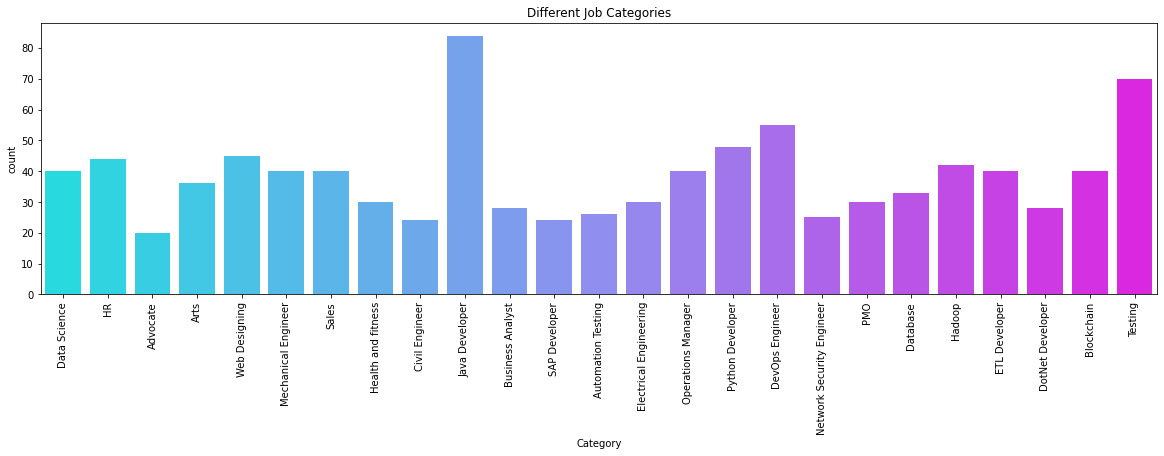

In [13]:
# Different Job Categories with sns
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Category, palette='cool')
plt.xticks(rotation=90)
plt.title("Different Job Categories")

Text(0.5, 1.0, 'Different Job Categories')

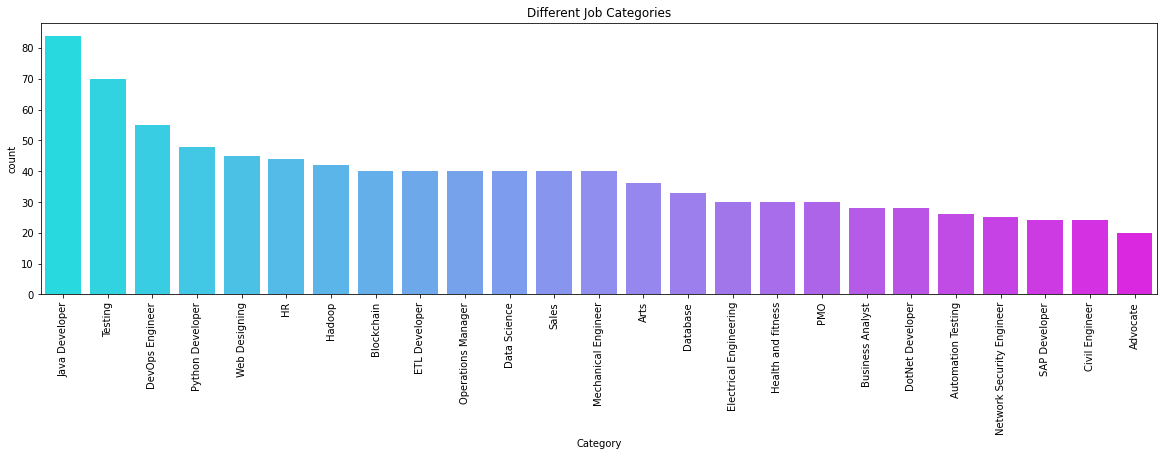

In [14]:
# Different Job Categories with sns in order 
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Category, order=df.Category.value_counts().index, palette='cool')
plt.xticks(rotation=90)
plt.title("Different Job Categories")

In [15]:
# Different Job Categories with plotly
px.bar(data_frame=df, x=df.Category, color=df.Category)

In [16]:
categories = df.Category.value_counts().to_frame().reset_index()
categories.columns = ['Job', 'Count']
categories

Job  Count
0              Java Developer     84
1                     Testing     70
2             DevOps Engineer     55
3            Python Developer     48
4               Web Designing     45
5                          HR     44
6                      Hadoop     42
7                  Blockchain     40
8               ETL Developer     40
9          Operations Manager     40
10               Data Science     40
11                      Sales     40
12        Mechanical Engineer     40
13                       Arts     36
14                   Database     33
15     Electrical Engineering     30
16         Health and fitness     30
17                        PMO     30
18           Business Analyst     28
19           DotNet Developer     28
20         Automation Testing     26
21  Network Security Engineer     25
22              SAP Developer     24
23             Civil Engineer     24
24                   Advocate     20

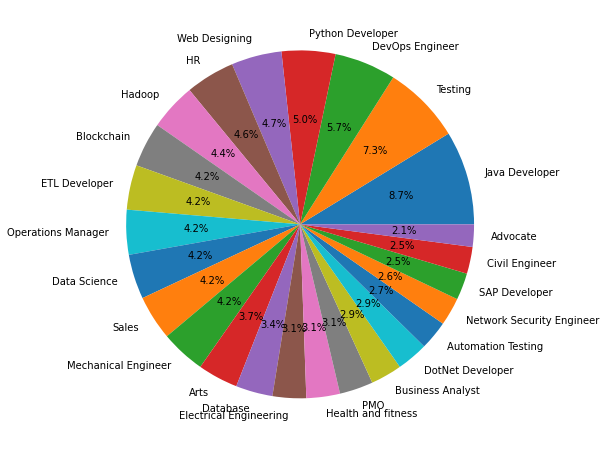

In [17]:
plt.figure(figsize=(25,8))
plt.pie(x=categories.Count, labels=categories.Job, autopct = '%.1f%%')
plt.show()

### Preprocessing

Let's create a helper function to remove URLs, hashtags, mentions, special letters and punctuation

In [18]:
df['cleaned_resume'] = ""
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

### sub() fucn:
- **The sub() function replaces the matches with the text of your choice**

- **Syntax**:
    - **re.sub(pattern, repl, string, count=0, flags=0)**

In [19]:
# Creating a fucntion to clean the resume by removing the unnecessary things like URLs, hashtags, mentions and etc.
import re # regualr expression library

def cleanedResume(resumeText):
  
  # Remove URLs
  resumeText = re.sub(pattern='http\S+\s*', repl=' ', string=resumeText)
  
  # remove RT and cc
  resumeText = re.sub(pattern='RT|cc', repl=' ', string=resumeText)

  # remove hashtags
  resumeText = re.sub(pattern='#\S+', repl=' ', string=resumeText)

  # remove mentions
  resumeText = re.sub(pattern='@\S+', repl=' ', string=resumeText)

  # remove punctuations
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), repl=' ', string=resumeText)
  
  resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
  
  # remove extra whitespace
  resumeText = re.sub('\s+', ' ', resumeText)

  return resumeText

In [20]:
# Applying it to the column 'cleaned_resume' in df dataframe
df.cleaned_resume = df.Resume.apply(lambda x: cleanedResume(x))

In [21]:
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

#### Creating Wordcloud

### WORDCLOUD:
- **Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.**
- Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.


- **Syntax:**
    -   word_cloud = **WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)**
          - text = the string of which you wnant to make word cloud

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
SetOfStopwords = set(stopwords.words('english')+['``',"''"])
# print(list(SetOfStopwords))

In [24]:
totalwords = []

In [25]:
Sentences = df.Resume.values

In [26]:
cleanedSentences = ""

#### NLTK Tokenizer Package

- **Tokenizers divide strings into lists of substrings**. 
- For example, tokenizers can be used to find the words and punctuation in a string:
  - ex:-
    - from nltk.tokenize import word_tokenize
    - s = '''Good muffins cost $3.88\nin New York.  Please buy me
    - word_tokenize(s) 
    - output = ['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.',
'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


In [27]:
for records in Sentences:
  cleanedText = cleanedResume(records)
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)

  for word in requiredWords:
    if word not in SetOfStopwords and word not in string.punctuation:
      totalwords.append(word)

In [28]:
# nltk.FreqDist() = the FreqDist function which gives you the frequency of words within a text.
wordfreqdist = nltk.FreqDist(totalwords)

In [29]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [30]:
most_common_words = wordfreqdist.most_common(40)
most_common_words

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746),
 ('Pvt', 730),
 ('application', 727),
 ('System', 715),
 ('reports', 697),
 ('business', 696),
 ('India', 693),
 ('requirements', 693),
 ('I', 690),
 ('various', 688),
 ('A', 688)]

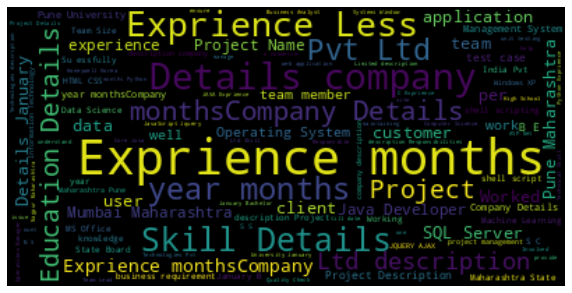

In [31]:
word_cloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Visualizing most commonly used words in each type of Resumes

In [32]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 
   'viridis', 'viridis_r', 'vlag', 'vlag_r', 
   'winter', 'winter_r','BrBG_r', 'BuGn', 
   'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 
   'autumn_r', 'binary', 'binary_r', 'bone', 
   'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']

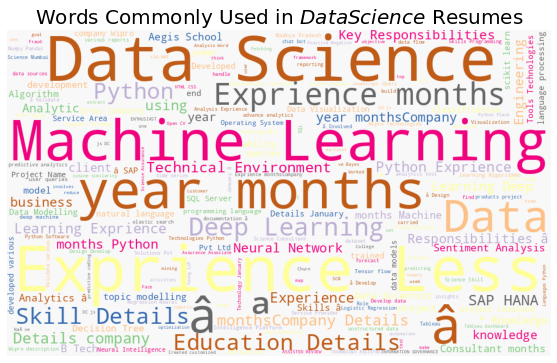

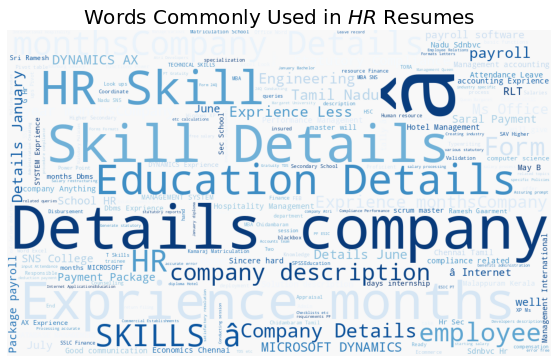

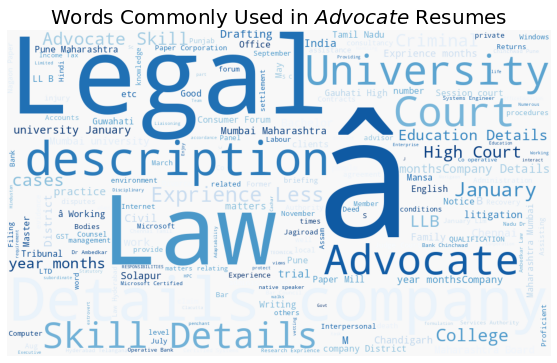

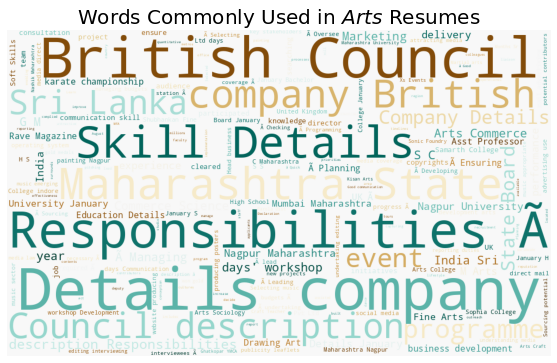

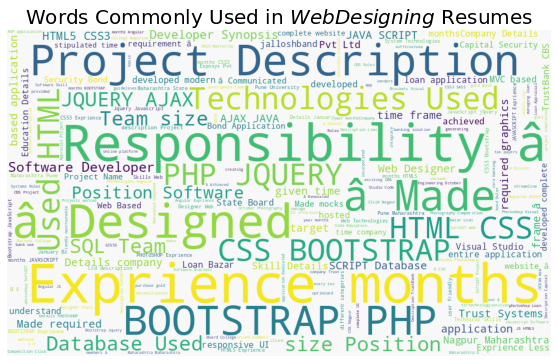

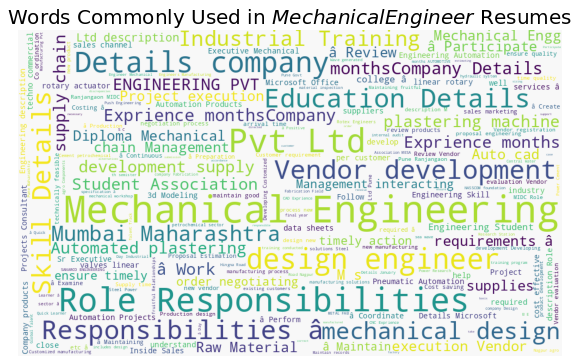

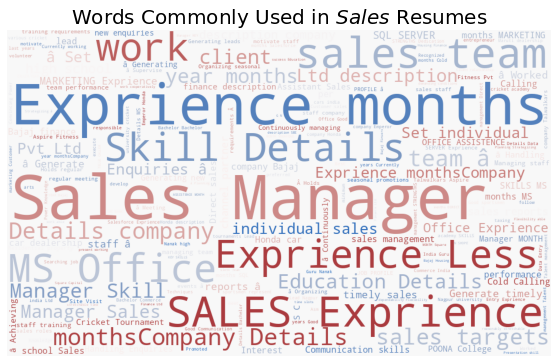

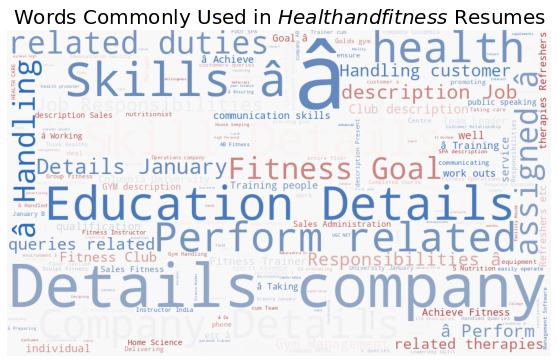

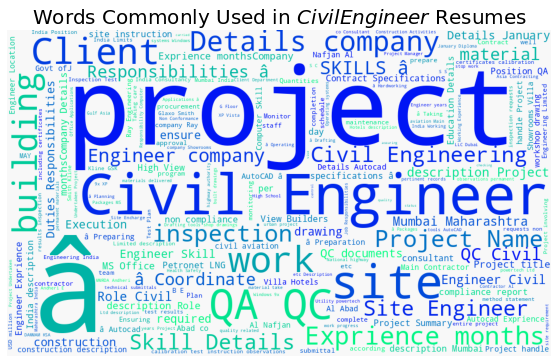

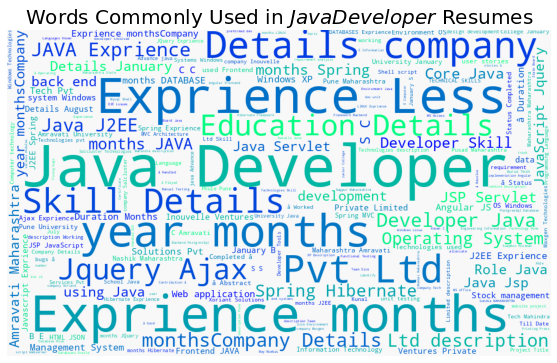

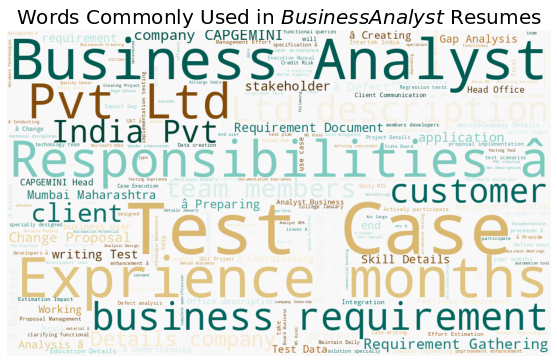

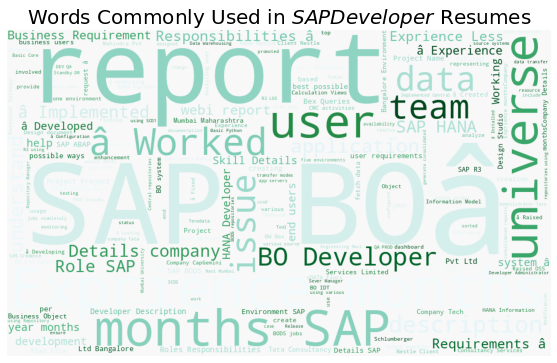

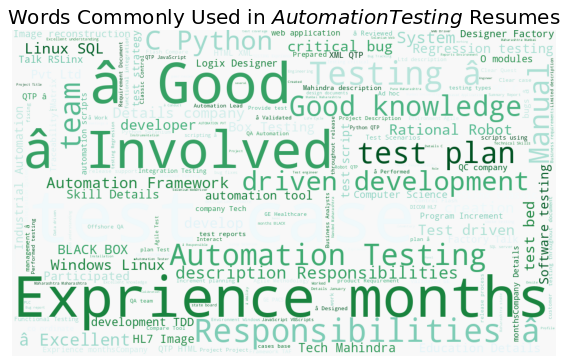

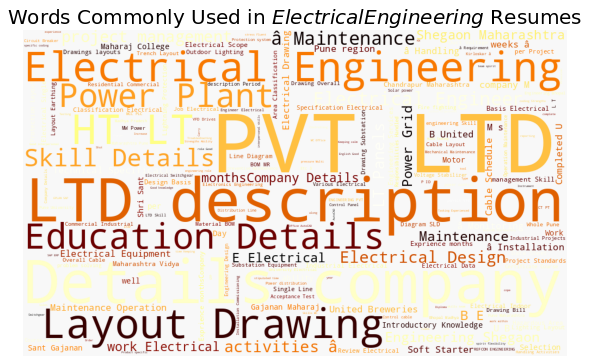

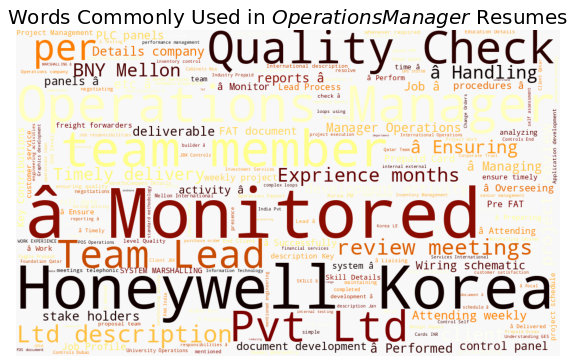

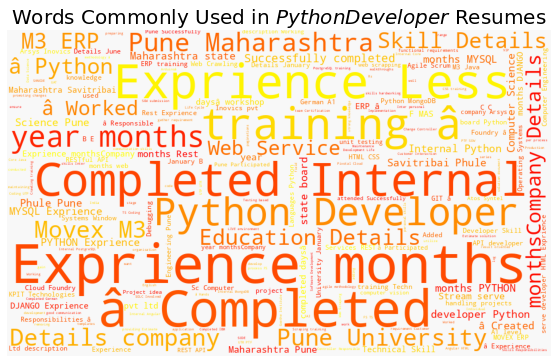

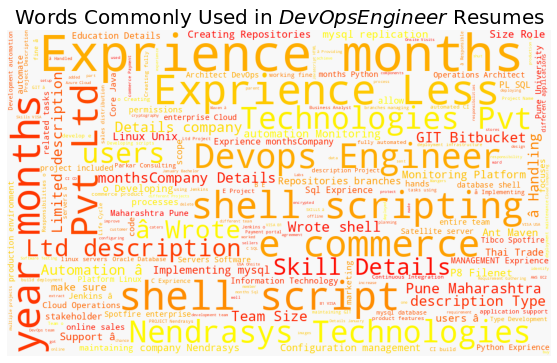

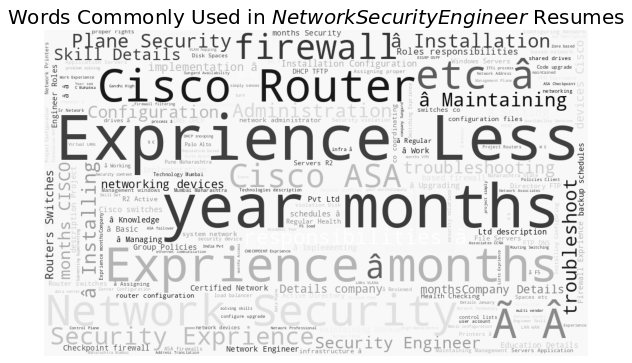

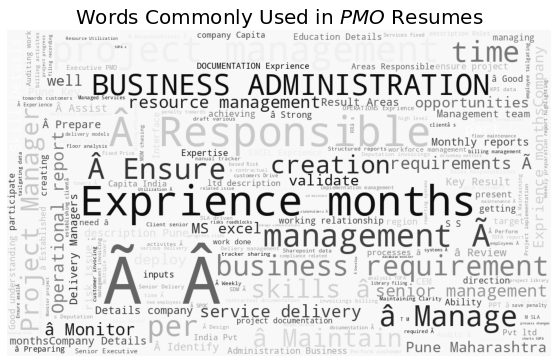

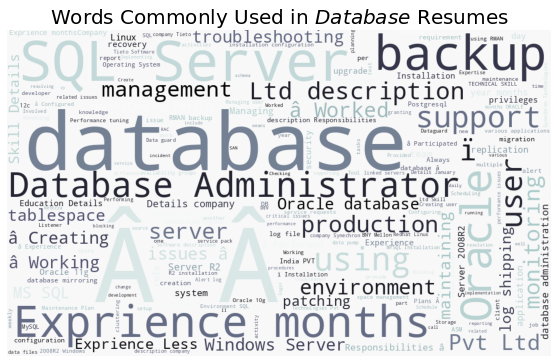

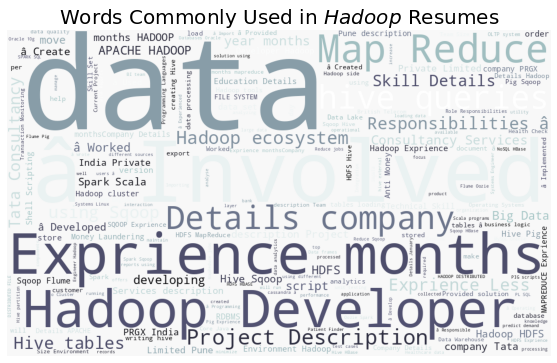

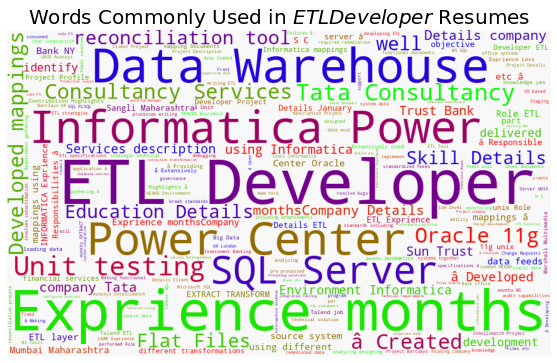

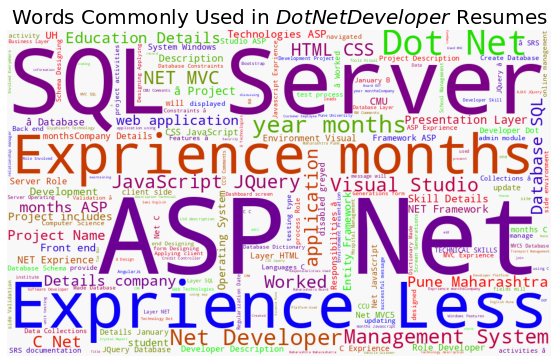

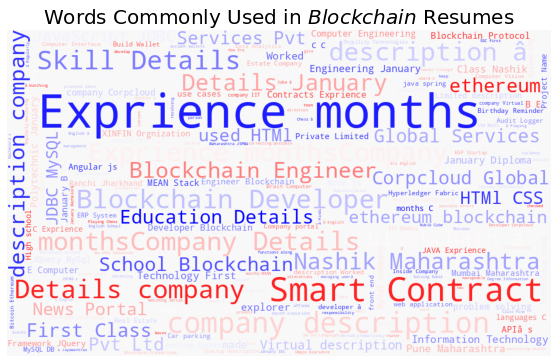

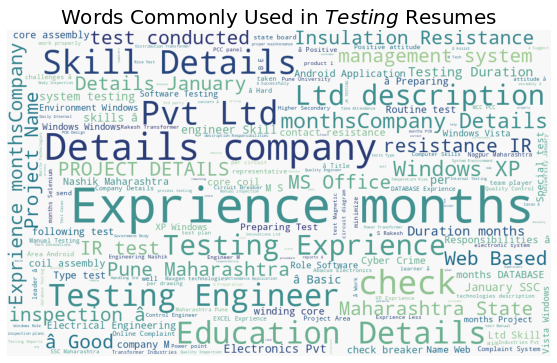

In [33]:
for label, cmap in zip(df.Category.unique(), a):
  text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
  plt.figure(figsize=(10,6))
  wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
  wc.generate_from_text(text)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
  plt.show()
  print('\n\n')

#### Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form

Encoding the Category column:

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
df.Category = le.fit_transform(df.Category)

In [37]:
df.head()

Category                                             Resume  \
0         6  Skills * Programming Languages: Python (pandas...   
1         6  Education Details \r\nMay 2013 to May 2017 B.E...   
2         6  Areas of Interest Deep Learning, Control Syste...   
3         6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4         6  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [38]:
# Category column
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

## Splitting the Data into Train and Test Data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [40]:
X = df.cleaned_resume.values
y = df.Category.values

Here we will preprocess and convert the ‘cleaned_resume’ column into vectors. We will be using the ‘Tf-Idf’ method to get the vectors:

In [41]:
# Transforming "X" as a bag-of-words(Tfidf)
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(X)
WordFeatures =  word_vectorizer.transform(X) # will return the Tf-Idf values

In [42]:
# print(WordFeatures)

In [43]:
WordFeatures.shape

(962, 7351)

In [44]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, y, test_size=0.2, random_state=1)

In [45]:
X_train.shape, X_test.shape

((769, 7351), (193, 7351))

## Building Models

We have trained and tested the data and now let’s build the models:

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier

In [47]:
from scipy.special import kn
models = {'Logistic Regression': LogisticRegression(),
          'Support Vector Machine': SVC(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes': MultinomialNB()}

In [48]:
# OneVsRestClassifier
model_list = []

for model in models.values():
  model_list.append(OneVsRestClassifier(model))

In [49]:
model_list

[OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier()),
 OneVsRestClassifier(estimator=MultinomialNB())]

In [50]:
# Training all the models together
for i in model_list:
  i.fit(X_train, y_train)
  print(f"{i} trained..")

print("*"*60)
print("All models are trained.")

OneVsRestClassifier(estimator=LogisticRegression()) trained..
OneVsRestClassifier(estimator=SVC()) trained..
OneVsRestClassifier(estimator=RandomForestClassifier()) trained..
OneVsRestClassifier(estimator=MultinomialNB()) trained..
************************************************************
All models are trained.


In [51]:
  for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set: {model_list[count].score(X_train, y_train)}")
    print(f"Accuracy of {value} on test set: {model_list[count].score(X_test, y_test)}")
    print("*"*100)
    print('\n')

print("Accuracy Scores for all the classifiers are calculated.")

Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set: 0.9948186528497409
****************************************************************************************************


Accuracy of OneVsRestClassifier(estimator=SVC()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set: 0.9948186528497409
****************************************************************************************************


Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set: 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test set: 0.9948186528497409
****************************************************************************************************


Accuracy of OneVsRestClassifier(estimator=MultinomialNB()) on training set: 0.9973992197659298
Accuracy of OneVsRestClassifier(estimator=MultinomialNB()) on test set: 1.0

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
for count, value in enumerate(model_list):
  print(f"{value} classification report:")
  print("-"*80)
  prediction = model_list[count].predict(X_test)
  print(classification_report(y_test, prediction))
  print("*"*100)
  print(" ")

OneVsRestClassifier(estimator=LogisticRegression()) classification report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      1.00

## Cross Validation for Models

In [54]:
from sklearn.model_selection import cross_val_score, KFold

In [55]:
# results = {}

# kf = KFold(n_splits=10)

# for count, value in enumerate(model_list):
#   result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv=kf)
#   results[value] = result

In [56]:
print("r2 scores")
print("*********************************")

for name, result in results.items():
  print(f"{name} : {round(np.mean(result),3)}")
  print("----------------")

r2 scores
*********************************


NameError: ignored